In [12]:
sys.path.append(os.path.abspath(os.path.join('..','./data/', './clean-data/')))
sys.path.append(os.path.abspath(os.path.join('..','./scripts/')))


import pandas as pd
from pathlib import Path

from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

import xgboost as xgb

from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedGroupKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LogisticRegression

import sys, os

import matplotlib.pyplot as plt

# Accuracy score
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score

from sklearn.neighbors import KNeighborsRegressor


from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.inspection import DecisionBoundaryDisplay

from sklearn.metrics import ConfusionMatrixDisplay

In [29]:

def remove_missing_values(fuel_df, drop_smog=True, rating_column='co2_rating', drop_column='smog_rating'):

    # Drop smog_rating from non_na_rating
    if drop_smog:
        fuel_df.drop(columns=[drop_column], inplace=True)
    else:
        pass
    fuel_df['number_of_gears'].fillna(0, inplace=True)

    # Set up data pipeline - goal is to predict co2_rating 
    na_rating = fuel_df[fuel_df[rating_column].isna()]
    non_na_rating = fuel_df[~fuel_df[rating_column].isna()]

    non_na_rating_class = non_na_rating.copy()
    na_rating_class = na_rating.copy()

    non_na_rating_class[rating_column] = non_na_rating_class[rating_column].astype(int)

    return non_na_rating_class, na_rating_class

def read_data(path):
    """
    This function reads data from csv files

    Parameters:
    ----------
        path: str
            path to data files

    Returns:
    -------
        fuel_df: pandas.DataFrame
            dataframe containing fuel cars data
        electric_df: pandas.DataFrame
            dataframe containing electric cars data
        hybrid_df: pandas.DataFrame
            dataframe containing hybrid cars data

    """
    
    # Fuel based cars
    file_name_2022_1995 = "1995_today_vehicle_fuel_consumption.csv"
    
    # Electric cars
    pure_electric = "Batteryelectric_vehicles__.csv"
    hybric_vehicle = "Plugin_hybrid_electric_vehicles__.csv"

    # Read data files
    fuel_df = pd.read_csv(Path(path ,f'{file_name_2022_1995}'))
    electric_df = pd.read_csv(Path(path ,f'{pure_electric}'))
    hybrid_df = pd.read_csv(Path(path ,f'{hybric_vehicle}'))

    return fuel_df, electric_df, hybrid_df

fuel_df, electric_df, hybrid_df = read_data('../data/clean-data/')

non_na_rating_class, na_rating_class = remove_missing_values(hybrid_df)


Hybrid vehicles

In [31]:
non_na_rating_class.info(
    
)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 224 entries, 20 to 243
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   model_year                     224 non-null    int64  
 1   make_                          224 non-null    object 
 2   model.1_                       224 non-null    object 
 3   vehicleclass_                  224 non-null    object 
 4   motor_(kw)                     224 non-null    int64  
 5   enginesize_(l)                 224 non-null    float64
 6   cylinders_                     224 non-null    float64
 7   transmission_                  224 non-null    object 
 8   fuel_type1                     224 non-null    object 
 9   consumption_combinedle/100km   224 non-null    object 
 10  range1_(km)                    224 non-null    int64  
 11  recharge_time(h)               224 non-null    float64
 12  fuel_type2                     224 non-null    ob

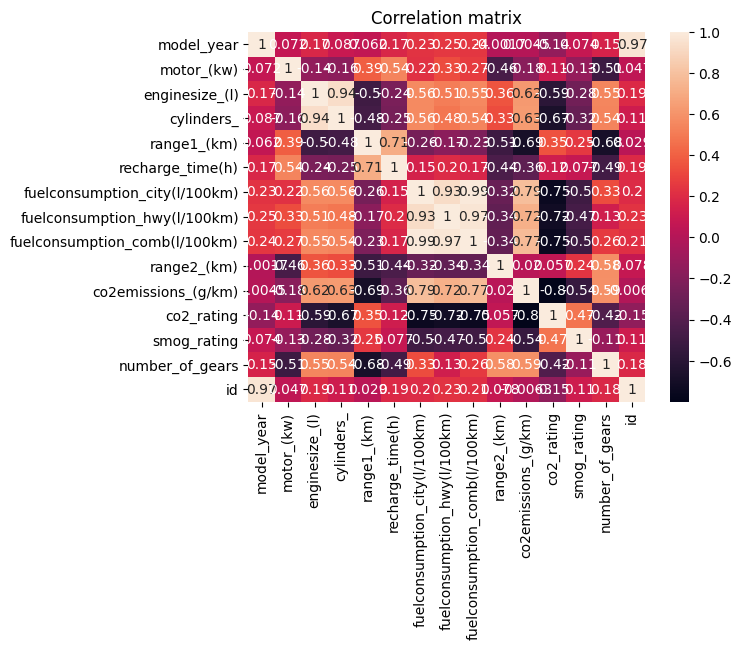

In [28]:
import seaborn as sns
corr_matrix = hybrid_df.corr()
fig_corr = sns.heatmap(corr_matrix, annot=True)
fig_corr.figure.savefig("./plots/hybrid_correlation_matrix.png") 
plt.title("Correlation matrix")
plt.show()